# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## COAD


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudy_COAD_soft.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">November 17th, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>
   
- [x] Apply on Cancer Datasets
    > COAD
    
**Dependent files:**

* Target (Cancer) data: 
    - *COAD_Interface.txt*

In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import os.path as op
import sys
import random
from pathlib import Path

from pprint import pprint
from IPython.display import display
from tqdm.notebook import tqdm

from helpers.helpers_predator.displayers import (
    display_label_counts, 
    display_labels, 
    visualize_label_counts,
    display_data,
)

from helpers.helpers_predator.visualizers import (
    visualize_sampled_train_datasets_label_counts
)

from helpers.helpers_predator.common import load_predator
from helpers.helpers_predator.common import export_data

# PATHS
COAD_PATH = Path(r"../../My-ELASPIC-Web-API/Elaspic_Results/Merged_Results/COAD_Interface_2022-01-06.txt")
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2021-10-24/04f37897/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "../data/predictions_datasets/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

## Load the Predator

In [2]:
predator = load_predator(PREDATOR_MODEL_PATH)

2022-01-06 12:03:41 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2021-10-24\04f37897\predator.pkl is loaded successfully.


## Prediction TCGA on Cancer Dataset: COAD

In [3]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('coad', COAD_PATH)]
)

2022-01-06 12:03:43 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `coad` ..
2022-01-06 12:03:43 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_coad_data` ..
2022-01-06 12:03:43 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2022-01-06 12:03:43 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2022-01-06 12:03:43 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_coad data materials  ..


#### TCGA Cancer Datasets

##### COAD

In [4]:
display_data(predator.data_materials["coad"])

Data dimensions: (14822, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P62873,P62873,S334I,done,interface,-,-,-,WD40,Beta_propeller,...,567.0,128.711,135.025,73.3808,73.3852,894.75,661.58,1556.32,6.34896,3.64695
1,Q9BXB4,Q9BXB4,N590D,done,interface,COSM273062,-,-,Oxysterol_BP,Oxysterol_BP,...,742.0,464.479,464.478,199.2630,199.2630,514.015,268.27,782.285,5.08133,3.32753
2,Q9BXB4,Q9BXB4,N590D,done,interface,COSM273062,-,-,Oxysterol_BP,Oxysterol_BP,...,742.0,464.479,464.478,199.2630,199.2630,514.015,268.27,782.285,5.08133,3.32753


#### Preprocessed TCGA Cancer Datasets

##### COAD

In [5]:
display_data(predator.data_materials["target_coad_data"])

Data dimensions: (14822, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P62873,S334I,Q13371,0.9971,0.997245,0.4626,0.417706,0.674524,0.962441,0.018744,...,567.0,128.711,135.025,73.3808,73.3852,894.750,661.58,1556.320,6.34896,3.64695
1,Q9BXB4,N590D,Q96SU4,0.2949,0.330155,0.3590,0.367350,1.239310,0.122305,0.004189,...,742.0,464.479,464.478,199.2630,199.2630,514.015,268.27,782.285,5.08133,3.32753
2,Q9BXB4,N590D,Q96SU4-3,0.2949,0.330155,0.3590,0.367350,1.239310,0.122305,0.004189,...,742.0,464.479,464.478,199.2630,199.2630,514.015,268.27,782.285,5.08133,3.32753


### Voting mode: `soft`

In [6]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('coad', COAD_PATH)]
)

2022-01-06 12:03:46 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `coad` ..
2022-01-06 12:03:46 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_coad_data` ..
2022-01-06 12:03:46 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2022-01-06 12:03:46 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2022-01-06 12:03:46 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_coad data materials  ..


In [7]:
predator.predict(voting='soft')

2022-01-06 12:03:47 | DEBUG    | Predator | Predicting on cancer datasets ..
2022-01-06 12:03:47 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2022-01-06 12:03:47 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2022-01-06 12:03:47 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2022-01-06 12:03:47 | DEBUG    | Predator | Predicting on coad cohort ..
2022-01-06 12:03:47 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       max_features='sqrt', n_estimators=600,
                       random_state=14593)
2022-01-06 12:03:47 | DEBUG    | helpers.helpers_predator.models | X shape: (14822, 10)
2022-01-06 12:03:47 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, max_depth=8, max_features=None,
                       min_samples_leaf=2

In [8]:
predator.predictions.keys()

dict_keys(['coad_prob'])

In [9]:
# Predictions for first 10 experiment.
predator.predictions["coad_prob"][:3]

[array([[0.51624061, 0.48375939],
        [0.58793882, 0.41206118],
        [0.58793882, 0.41206118],
        ...,
        [0.59864732, 0.40135268],
        [0.46419437, 0.53580563],
        [0.12757215, 0.87242785]]),
 array([[1.        , 0.        ],
        [0.        , 1.        ],
        [0.        , 1.        ],
        ...,
        [0.55208333, 0.44791667],
        [1.        , 0.        ],
        [0.        , 1.        ]]),
 array([[0.67044367, 0.32955633],
        [0.44107857, 0.55892143],
        [0.44107857, 0.55892143],
        ...,
        [0.6940426 , 0.3059574 ],
        [0.68545928, 0.31454072],
        [0.27290631, 0.72709369]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries whose predicted class-1 probability lies in both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may contain class-1 probability prediction of both lower than 0.50 and higher than 50. We drop such instances.

In [10]:
predator.predictions_post_process()

2022-01-06 12:03:57 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2022-01-06 12:03:57 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort coad ..
2022-01-06 12:03:57 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2022-01-06 12:03:57 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with coad cancer dataset ..
2022-01-06 12:03:58 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2022-01-06 12:05:13 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 2015): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.428544  O75843     M91T     P56377
1    0.542760  O75843     M91T     P56377
2    0.484187  P05362     M91T     P20701
3    0.599244  P05362     M91T     P20701
4    0.619415  P05362     M91T     P20701
2022-01-06 12:06:27 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 2162): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    1.000000  P15056    V600E     P53667
1    0.000000  P15056    V600E     P53667
2    1.000000  P15056    V600E     P53667
3    0.447917  Q9UK17     A16T     Q9NS61
4    0.447917  Q9UK17     A16T     Q9NS61
2022-01-06 12:07:56 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 1993): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.473489  P61224     T35M     Q12967
1    0.557060  P61224     T35M     Q12967
2   

In [11]:
predator.predictions.keys()

dict_keys(['coad_prob', 'coad_predicted_probs_datasets', 'coad_predicted_valid_datasets', 'coad_predicted_invalid_datasets', 'coad_finalized_prediction_dataframes'])

In [12]:
display_data(predator.predictions["coad_predicted_probs_datasets"][0])

Data dimensions: (14822, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.483759,P62873,P62873,S334I,done,interface,-,-,-,WD40,...,567.0,128.711,135.025,73.3808,73.3852,894.75,661.58,1556.32,6.34896,3.64695
1,0.412061,Q9BXB4,Q9BXB4,N590D,done,interface,COSM273062,-,-,Oxysterol_BP,...,742.0,464.479,464.478,199.2630,199.2630,514.015,268.27,782.285,5.08133,3.32753
2,0.412061,Q9BXB4,Q9BXB4,N590D,done,interface,COSM273062,-,-,Oxysterol_BP,...,742.0,464.479,464.478,199.2630,199.2630,514.015,268.27,782.285,5.08133,3.32753


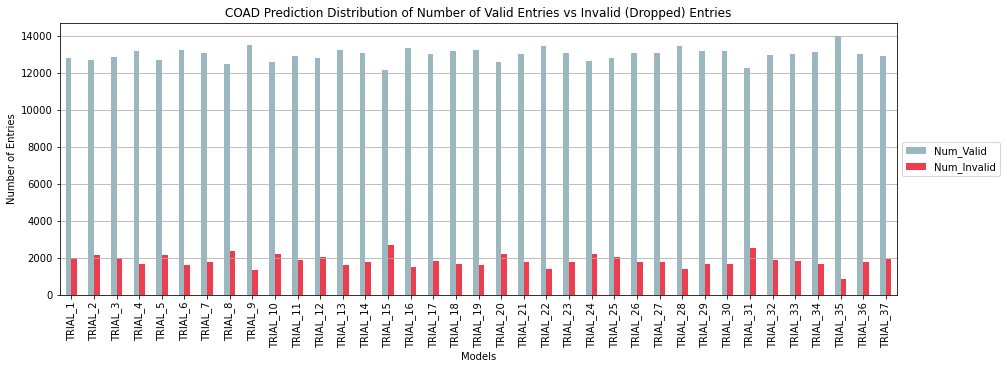

In [13]:
predator.predictions.plot_distribution_valid_vs_invalid("coad")

2022-01-06 12:49:05 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


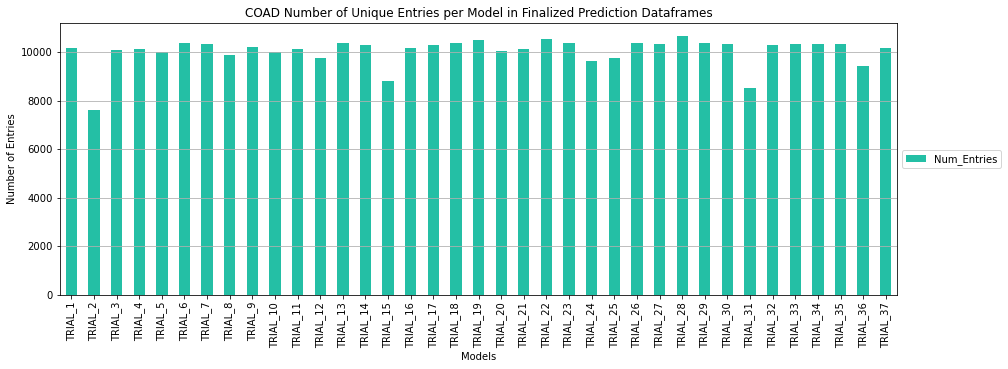

In [14]:
predator.predictions.plot_num_finalized_predictions("coad")

In [15]:
display_data(predator.predictions['coad_finalized_prediction_dataframes'][0])

Data dimensions: (10178, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.483759,P62873,S334I,Q13371
1,0.412061,Q9BXB4,N590D,Q96SU4
2,0.242782,P35251,V921A,P35250


In [16]:
predator.prepare_ensemble_prediction_data()

2022-01-06 12:49:06 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2022-01-06 12:49:06 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for coad taking median ..


  0%|          | 0/37 [00:00<?, ?it/s]

2022-01-06 13:03:26 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for coad is prepared.
Accessible from `coad_predictions_prob_data`.
2022-01-06 13:03:26 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for coad is prepared.
Accessible from `coad_ensemble_prediction_data`.
2022-01-06 13:03:26 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for coad.
Accessible from predictions.['coad_prediction_results']
2022-01-06 13:03:26 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for coad.
Accessible from predictions.['coad_prediction_results_no_votes_dropped']


In [17]:
display_data(predator.predictions['coad_predictions_prob_data'])

Data dimensions: (7816, 39)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 29,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,PROB_1s_AVG,VOTED_PREDICTION
0,0.483759,0.0,0.329556,0.43915,0.330858,0.561663,0.537679,0.55166,0.423441,0.504008,...,0.587467,0.884314,0.467926,0.500629,0.486272,0.476457,0.481496,0.606687,0.48376,0
1,0.412061,1.0,0.558921,0.653305,0.549252,0.681219,0.657425,0.618794,0.397983,0.536708,...,0.752778,0.366304,0.721878,0.599993,0.641604,0.688001,0.620979,0.638958,0.6416,1
2,0.242782,0.0,0.14892,0.251699,0.098007,0.366685,0.395311,0.201517,0.18895,0.394472,...,0.27963,0.173617,0.193992,0.355712,0.329133,0.551711,0.551203,0.157557,0.2517,0


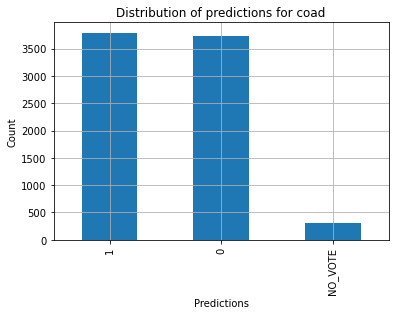

In [18]:
predator.predictions.plot_ensemble_prediction_distribution("coad")

In [19]:
coad_prediction_results_soft = predator.predictions['coad_prediction_results']
display_data(coad_prediction_results_soft)

Data dimensions: (7816, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P62873,S334I,Q13371,0
1,Q9BXB4,N590D,Q96SU4,1
2,P35251,V921A,P35250,0


In [20]:
coad_prediction_results_soft_no_votes_dropped = predator.predictions["coad_prediction_results_no_votes_dropped"]
display_data(coad_prediction_results_soft_no_votes_dropped)

Data dimensions: (7517, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P62873,S334I,Q13371,0
1,Q9BXB4,N590D,Q96SU4,1
2,P35251,V921A,P35250,0


Label counts:
Disrupting                3726
Increasing + No Effect    3791
Name: Prediction, dtype: int64


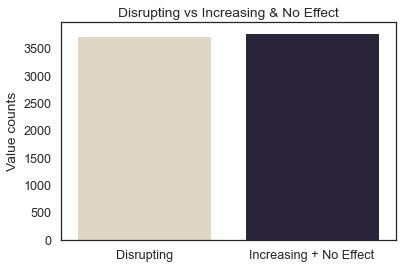

In [21]:
visualize_label_counts(coad_prediction_results_soft_no_votes_dropped, 'Prediction')

In [22]:
coad_ensemble_prediction_data_soft = predator.predictions["coad_ensemble_prediction_data"]

In [23]:
coad_predictions_prob_data_soft = predator.predictions["coad_predictions_prob_data"]

In [24]:
def add_median_probabilities(prediction_results, predictions_prob_data):
    assert len(prediction_results) == len(predictions_prob_data)
    prediction_results_with_probabilities = prediction_results.copy()
    prediction_results_with_probabilities["Median_Probability"] = predictions_prob_data["PROB_1s_AVG"]
    return prediction_results_with_probabilities

In [25]:
coad_prediction_results_soft_with_median_probs = add_median_probabilities(
    prediction_results=predator.predictions["coad_prediction_results"],
    predictions_prob_data=predator.predictions["coad_predictions_prob_data"]
)
coad_prediction_results_soft_with_median_probs.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P62873,S334I,Q13371,0,0.48376
1,Q9BXB4,N590D,Q96SU4,1,0.6416
2,P35251,V921A,P35250,0,0.2517
3,P08123,K1248N,P25940,1,0.78179
4,P15056,V600E,P53667,0,0.43582


In [26]:
coad_prediction_results_soft_no_votes_dropped_with_median_probabilities = coad_prediction_results_soft_with_median_probs[
    coad_prediction_results_soft_with_median_probs['Prediction'].isin([0, 1])
]

In [27]:
len(coad_prediction_results_soft_no_votes_dropped_with_median_probabilities)

7517

## Exporting Predictions

In [28]:
# coad_prediction_results = coad_prediction_results_hard_no_votes_dropped
# coad_prediction_results = coad_prediction_results_soft_no_votes_dropped
coad_prediction_results = coad_prediction_results_soft_no_votes_dropped_with_median_probabilities
display_data(coad_prediction_results)

Data dimensions: (7517, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P62873,S334I,Q13371,0,0.48376
1,Q9BXB4,N590D,Q96SU4,1,0.6416
2,P35251,V921A,P35250,0,0.2517


In [29]:
predator.export_prediction(
    tcga="coad",
    data=coad_prediction_results,
    file_name="predictions",
    folder_path=PREDICTIONS_DATASETS_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2022-01-06 13:09:30 | DEBUG    | helpers.helpers_predator.common | Folder with ID 9789393f is created.
2022-01-06 13:09:30 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location ../data/predictions_datasets/ in folder coad_prediction_2022-01-06\9789393f..
2022-01-06 13:09:30 | INFO     | helpers.helpers_predator.common | ../data/predictions_datasets/coad_prediction_2022-01-06\9789393f\predictions_soft_2022-01-06.csv is exported successfully.
2022-01-06 13:09:30 | INFO     | helpers.helpers_predator.common | Config is exported.


---